# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from scipy import stats
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils/')

In [4]:
import make_multisimulation_dataset

In [5]:
from load_ensembles import *

In [6]:
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

In [7]:
from utils import *

In [8]:
from load_gridcell_areas import *

# Load ensemble

In [9]:
fnames=glob.glob('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/cpl/proc/*')

In [42]:
ds=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/cpl/proc/COUP0000_PI_SOM.cpl.ha2x1d.0051-02.nc')

In [48]:
ds.time

<xarray.DataArray 'time' (time: 120)>
array([cftime.DatetimeNoLeap(159, 2, 1, 0, 0, 0, 0, 1, 32),
       cftime.DatetimeNoLeap(159, 3, 1, 0, 0, 0, 0, 1, 60),
       cftime.DatetimeNoLeap(159, 4, 1, 0, 0, 0, 0, 4, 91),
       cftime.DatetimeNoLeap(159, 5, 1, 0, 0, 0, 0, 6, 121),
       cftime.DatetimeNoLeap(159, 6, 1, 0, 0, 0, 0, 2, 152),
       cftime.DatetimeNoLeap(159, 7, 1, 0, 0, 0, 0, 4, 182),
       cftime.DatetimeNoLeap(159, 8, 1, 0, 0, 0, 0, 0, 213),
       cftime.DatetimeNoLeap(159, 9, 1, 0, 0, 0, 0, 3, 244),
       cftime.DatetimeNoLeap(159, 10, 1, 0, 0, 0, 0, 5, 274),
       cftime.DatetimeNoLeap(159, 11, 1, 0, 0, 0, 0, 1, 305),
       cftime.DatetimeNoLeap(159, 12, 1, 0, 0, 0, 0, 3, 335),
       cftime.DatetimeNoLeap(160, 1, 1, 0, 0, 0, 0, 6, 1),
       cftime.DatetimeNoLeap(160, 2, 1, 0, 0, 0, 0, 2, 32),
       cftime.DatetimeNoLeap(160, 3, 1, 0, 0, 0, 0, 2, 60),
       cftime.DatetimeNoLeap(160, 4, 1, 0, 0, 0, 0, 5, 91),
       cftime.DatetimeNoLeap(160, 5, 1, 0, 0, 0, 0, 

In [51]:
ds=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/hist/'+
                   'COUP0000_PI_SOM.clm2.h3.0058-01-02-00000.nc')

In [60]:
ds.WBT

<xarray.DataArray 'WBT' (time: 365, lat: 96, lon: 144)>
[5045760 values with dtype=float32]
Coordinates:
  * time     (time) object 0058-01-02 00:00:00 ... 0059-01-01 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0
Attributes:
    long_name:     2 m Stull Wet Bulb
    units:         C
    cell_methods:  time: mean

In [53]:
BTRAN2          (time, lat, lon) float32 ...
BTRANMN         (time, lat, lon) float32 ...

EFLX_LH_TOT     (time, lat, lon) float32 ...
FSH_TO_COUPLER  (time, lat, lon) float32 ...
#FCEV            (time, lat, lon) float32 ...
#FCTR            (time, lat, lon) float32 ...
#FGEV            (time, lat, lon) float32 ...

FIRE            (time, lat, lon) float32 ...
FLDS            (time, lat, lon) float32 ...
FSDS            (time, lat, lon) float32 ...

FSR             (time, lat, lon) float32 ...

HUMIDEX         (time, lat, lon) float32 ...
SWBGT           (time, lat, lon) float32 ... #2 m Simplified Wetbulb Globe Temp
TREFMNAV        (time, lat, lon) float32 ...
TREFMXAV        (time, lat, lon) float32 ...
WBT             (time, lat, lon) float32 ...

QBOT            (time, lat, lon) float32 ...

RAIN_FROM_ATM   (time, lat, lon) float32 ...

TBOT            (time, lat, lon) float32 ...
    
    
TSA             (time, lat, lon) float32 ...
VPD2M           (time, lat, lon) float32 ...
VPD_CAN         (time, lat, lon) float32 ...
WIND            (time, lat, lon) float32 ...

<xarray.Dataset>
Dimensions:         (hist_interval: 2, lat: 96, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 144, nvegwcs: 4, time: 365)
Coordinates:
  * levgrnd         (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levsoi          (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.06 5.95 6.94 8.03
  * levlak          (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * levdcmp         (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * time            (time) object 0058-01-02 00:00:00 ... 0059-01-01 00:00:00
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat             (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0
Dimensions without coordinates: hist_interval, nvegwcs
Data variables:
    mcdate          (time) int32 ...
    mcsec           (time) int32 ...
    mdcur           (time) int32 ...
    mscur           (time) int32 ...
    nstep           (time) int32 ...
    time_bounds     (time, hist_inte

In [ ]:
a2x3h_Sa_z: Height at the lowest model level (m)
a2x3h_Sa_topo: Surface height (m)
    a2x3h_Sa_u: Zonal wind at the lowest model level (m/s)
    a2x3h_Sa_v: Meridional wind at the lowest model level (m/s)
    #a2x3h_Sa_tbot: Temperature at the lowest model level (K)
    a2x3h_Sa_ptem: Potential temperature at the lowest model level (K)
    a2x3h_Sa_shum: Specific humidity at the lowest model level (kg/kg)
    a2x3h_Sa_dens: Density at the lowest model level (kg/m3)
    a2x3h_Sa_pbot: Pressure at the lowest model level (Pa)
    a2x3h_Sa_pslv: Sea level pressure (Pa)
    a2x3h_Faxa_lwdn: Downward longwave heat flux (W/m2)
    a2x3h_Faxa_rainc: Convective precipitation rate (kg/m2/s)
    a2x3h_Faxa_rainl: Large-scale (stable) precipitation rate (kg/m2/s)
    a2x3h_Faxa_snowc: Convective snow rate (water equivalent) (kg/m2/s)
    a2x3h_Faxa_snowl: Large-scale (stable) snow rate (water equivalent)
    a2x3h_Faxa_swndr: Direct near-infrared incident solar radiation
    a2x3h_Faxa_swvdr: Direct visible incident solar radiation
    a2x3h_Faxa_swndf: Diffuse near-infrared incident solar radiation
    a2x3h_Faxa_swvdf: Diffuse visible incident solar radiation
    a2x3h_Sa_co2diag: Diagnostic CO2 at the lowest model level
    a2x3h_Sa_co2prog: Prognostic CO2 at the lowest model level

In [15]:
ds

<xarray.Dataset>
Dimensions:           (a2x3h_nx: 144, a2x3h_ny: 96, ntb: 2, time: 240)
Coordinates:
  * time              (time) object 0114-09-01 01:30:00 ... 0114-09-30 22:30:00
Dimensions without coordinates: a2x3h_nx, a2x3h_ny, ntb
Data variables:
    time_bnds         (time, ntb) object ...
    a2x3h_Sa_z        (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_topo     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_u        (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_v        (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_tbot     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_ptem     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_shum     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_dens     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_pbot     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_pslv     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Faxa_lwdn   (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Faxa_rainc  (time, a2

In [13]:
ds.a2x1h_Sa_u
ds.a2x1h_Sa_v

<xarray.Dataset>
Dimensions:     (a2x1h_nx: 144, a2x1h_ny: 96, ntb: 2, time: 720)
Coordinates:
  * time        (time) object 0064-04-01 00:30:00 ... 0064-04-30 23:29:59
Dimensions without coordinates: a2x1h_nx, a2x1h_ny, ntb
Data variables:
    time_bnds   (time, ntb) object ...
    a2x1h_Sa_u  (time, a2x1h_ny, a2x1h_nx) float32 ...
    a2x1h_Sa_v  (time, a2x1h_ny, a2x1h_nx) float32 ...
Attributes:
    file_version:   cpl7v10
    model_doi_url:  
    history:        Wed Mar 30 15:56:02 2022: ncrcat ../hist/COUP0000_PI_SOM....
    NCO:            netCDF Operators version 4.9.5 (Homepage = http://nco.sf....

In [7]:
ensemble_offline_Ts=load_offline_ensemble(var='TSKIN', domain='lnd')
ensemble_offline_FSDS=load_offline_ensemble(var='FSDS', domain='lnd')
ensemble_offline_FSA=load_offline_ensemble(var='FSA', domain='lnd')
ensemble_offline_LH=load_offline_ensemble(var='EFLX_LH_TOT', domain='lnd')
ensemble_offline_SH=load_offline_ensemble(var='FSH', domain='lnd')
ensemble_offline_FIRA=load_offline_ensemble(var='FIRA', domain='lnd') #	net infrared (longwave) radiation
ensemble_offline_FIRE=load_offline_ensemble(var='FIRE', domain='lnd') #emitted infrared (longwave) radiation
ensemble_offline_LAISUN=load_offline_ensemble(var='LAISUN', domain='lnd')
ensemble_offline_LAISHA=load_offline_ensemble(var='LAISHA', domain='lnd')
ensemble_offline_GSSUNLN=load_offline_ensemble(var='GSSUNLN', domain='lnd')
ensemble_offline_GSSHALN=load_offline_ensemble(var='GSSHALN', domain='lnd')
ensemble_offline_HTOP=load_offline_ensemble(var='HTOP', domain='lnd')

In [8]:
basecase_lnd_offline_Ts=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'TSKIN'+'.nc')
basecase_lnd_offline_FSDS=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSDS'+'.nc')
basecase_lnd_offline_FSA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSA'+'.nc')
basecase_lnd_offline_LH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'EFLX_LH_TOT'+'.nc')
basecase_lnd_offline_SH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSH'+'.nc')
basecase_lnd_offline_FIRE=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FIRE'+'.nc')
basecase_lnd_offline_FIRA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FIRA'+'.nc')
basecase_lnd_offline_LAISUN=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'LAISUN'+'.nc')
basecase_lnd_offline_LAISHA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'LAISHA'+'.nc')
basecase_lnd_offline_GSSUNLN=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'GSSUNLN'+'.nc')
basecase_lnd_offline_GSSHALN=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'GSSHALN'+'.nc')
basecase_lnd_offline_HTOP=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'HTOP'+'.nc')

# X

In [47]:
ds_grid=ensemble_offline_Ts[0]

In [55]:
delta_htop = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='TSKIN', keys=keys)

ref_htop=(basecase_lnd_offline_HTOP.HTOP[60*12:,:,:]).groupby('time.month').mean(dim='time')
ref_htop=ref_htop.mean(dim='month')

for i, ds in enumerate(ensemble_offline_HTOP):
    print(i)
    ds_htop=ds.HTOP[60*12:,:,:].groupby('time.month').mean(dim='time')
    delta_htop[:,:,i]=(ds_htop.mean(dim='month')-ref_htop).load()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [38]:
delta_albedo = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='TSKIN', keys=keys)

basecase_albedo=(1-(basecase_lnd_offline_FSA.FSA[60*12:,:,:].groupby('time.month').mean(dim='time')/
                    basecase_lnd_offline_FSDS.FSDS[60*12:,:,:].groupby('time.month').mean(dim='time')))
basecase_albedo=basecase_albedo.mean(dim='month')

for i, ds in enumerate(ensemble_offline_FSA):
    print(i)
    ds_fsa=ds.FSA[60*12:,:,:].groupby('time.month').mean(dim='time')
    ds_fsds=ensemble_offline_FSDS[i].FSDS[60*12:,:,:].groupby('time.month').mean(dim='time')
    ds_albedo=(1-ds_fsa/ds_fsds)
    delta_albedo[:,:,i]=(ds_albedo.mean(dim='month')-basecase_albedo).load()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [69]:
delta_albedo

<xarray.DataArray (lat: 96, lon: 144, ensemble_key: 36)>
array([[[ 0.000000e+00,  0.000000e+00, ..., -1.116395e-04,  2.759695e-04],
        [ 0.000000e+00,  0.000000e+00, ..., -1.080036e-04,  2.698302e-04],
        ...,
        [ 5.960464e-08,  5.960464e-08, ..., -1.128912e-04,  2.794266e-04],
        [ 5.960464e-08,  5.960464e-08, ..., -1.126528e-04,  2.783537e-04]],

       [[-5.960464e-08, -5.960464e-08, ..., -1.096725e-04,  2.204180e-04],
        [ 0.000000e+00,  0.000000e+00, ..., -1.077056e-04,  2.123713e-04],
        ...,
        [ 0.000000e+00,  0.000000e+00, ..., -1.105666e-04,  1.831651e-04],
        [ 0.000000e+00,  0.000000e+00, ..., -1.122355e-04,  1.969337e-04]],

       ...,

       [[          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,    

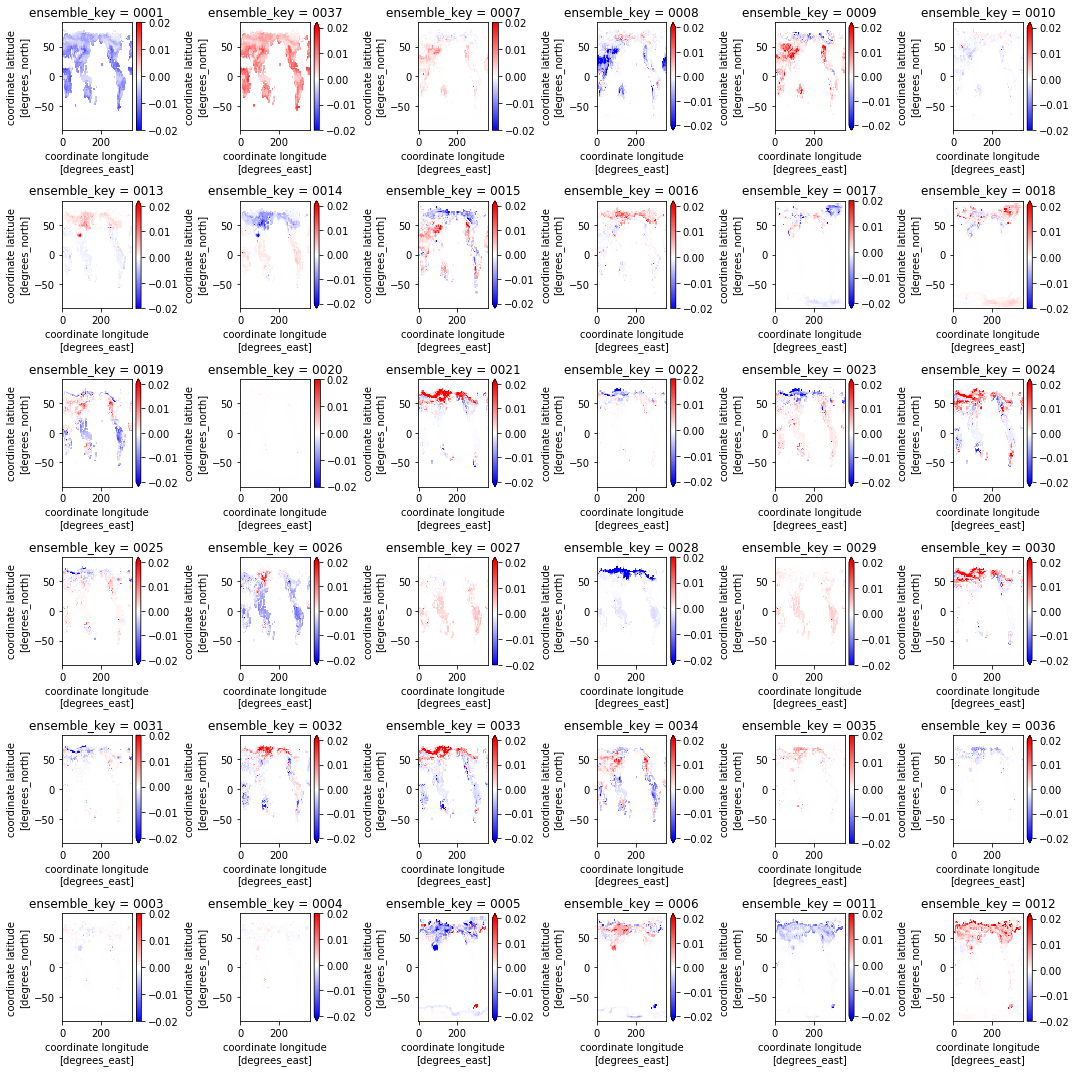

In [72]:
plt.figure(figsize=(15,15))
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    delta_albedo[:,:,i].plot(vmin=-0.02, vmax=0.02, cmap=plt.cm.bwr)
plt.tight_layout()

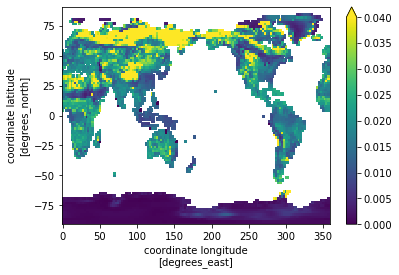

In [68]:
(delta_albedo.max(dim='ensemble_key')-
 delta_albedo.min(dim='ensemble_key')).plot(vmax=0.04)

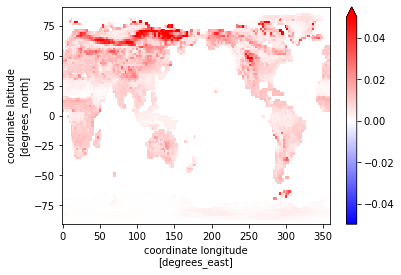

In [62]:
delta_albedo.max(dim='ensemble_key').plot(vmin=-0.05, vmax=0.05, cmap=plt.cm.bwr)

In [33]:
basecase_albedo

<xarray.DataArray (month: 12)>
array([0.543279, 0.468565, 0.367103, 0.330851, 0.317236, 0.276965, 0.240161,
       0.226168, 0.257062, 0.394383, 0.521564, 0.565447], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [30]:
ds_fsa#.plot()

<xarray.DataArray 'FSA' (month: 12)>
dask.array<shape=(12,), dtype=float32, chunksize=(1,)>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# Calculate kernels

In [178]:
ds_a1=xr.open_mfdataset('/glade/work/czarakas/Lague_kernels/global_a1_cv2_hc0.1_rs100_offline_b07/'+
                   'means/global_a1_cv2_hc0.1_rs100_offline_b07.clm2.h0.20-50_year_avg.nc')
ds_a2=xr.open_mfdataset('/glade/work/czarakas/Lague_kernels/global_a2_cv2_hc0.1_rs100_offline_b07/'+
                   'means/global_a2_cv2_hc0.1_rs100_offline_b07.clm2.h0.20-50_year_avg.nc')
ds_rs200=xr.open_mfdataset('/glade/work/czarakas/Lague_kernels/global_a2_cv2_hc0.1_rs200_offline_b07/'+
                   'means/global_a2_cv2_hc0.1_rs200_offline_b07.clm2.h0.20-50_year_avg.nc')

In [179]:
delta_ts_rs=(ds_rs200.MML_ts-ds_a2.MML_ts).mean(dim='time')
delta_ts_a=(ds_a1.MML_ts-ds_a2.MML_ts).mean(dim='time')
delta_rs=(ds_rs200.MML_evap_rs-ds_a2.MML_evap_rs).mean(dim='time')
delta_a=(ds_a1.MML_alb-ds_a2.MML_alb).mean(dim='time')

In [180]:
deltaTs_deltaAlbedo=delta_ts_a/delta_a
deltaTs_deltaRs=delta_ts_rs/delta_rs